In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sqlite3
%matplotlib inline

import os

for directory,_,filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(directory,filename))

./data/df_artists.csv
./data/team_project_JS-MD-MM.ipynb
./data/df_songs.csv
./data/data.db
./data/df_characteristics.csv
./data/df_genres.csv


In [295]:
cnx = sqlite3.connect('./data/data.db')

df_songs = pd.read_sql_query("SELECT * FROM songs", cnx)

In [296]:
df_artists = pd.read_sql_query("SELECT * FROM artist", cnx)

In [297]:
df_genre = pd.read_sql_query("SELECT * FROM genres", cnx)

In [298]:
df_char = pd.read_sql_query("SELECT * FROM characteristics", cnx)
df_char['length'] = df_char.length.apply(lambda x : int(x.replace(',','')))
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   song_id       1994 non-null   int64
 1   bpm           1994 non-null   int64
 2   energy        1994 non-null   int64
 3   danceability  1994 non-null   int64
 4   db            1994 non-null   int64
 5   liveness      1994 non-null   int64
 6   valence       1994 non-null   int64
 7   length        1994 non-null   int64
 8   acousticness  1994 non-null   int64
 9   speechiness   1994 non-null   int64
 10  popularity    1994 non-null   int64
dtypes: int64(11)
memory usage: 171.5 KB


In [299]:
df_songs.head(2)

,song_id,title,year,artist_id,genre_id
0,0,Sunrise,2004,0,0
1,33,Don't Know Why,2002,0,0


In [300]:
df = df_songs.merge(df_genre).merge(df_artists).merge(df_char)

In [301]:
df.head()

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74
2,10,Love Me Tender,2002,10,0,adult standards,Elvis Presley,109,5,44,-16,11,31,162,88,4,49
3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,10,0,adult standards,Elvis Presley,115,97,60,-6,13,72,212,0,5,64
4,387,(You're The) Devil in Disguise,2002,10,0,adult standards,Elvis Presley,123,73,48,-8,11,87,140,57,17,65


In [302]:
top10_genres = df.groupby('genre_name').count().\
sort_values(by='artist_id',ascending=False)[:10].reset_index()['genre_name']

top10_genres

0           album rock
1      adult standards
2            dutch pop
3     alternative rock
4            dance pop
5          dutch indie
6    alternative metal
7           dance rock
8        dutch cabaret
9         classic rock
Name: genre_name, dtype: object

In [303]:
bottom10_genres = df.groupby('genre_name').count().\
sort_values(by='artist_id',ascending=False)[:-10:-1].reset_index()['genre_name']

bottom10_genres

0                 yacht rock
1             classical rock
2      compositional ambient
3    contemporary vocal jazz
4                  cyberpunk
5                 danish pop
6                 diva house
7         classic soundtrack
8              electro house
Name: genre_name, dtype: object

In [304]:
df_top10_genres = df[df['genre_name'].isin(list(top10_genres))]
df_top10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71


In [305]:
df_bottom10_genres = df[df['genre_name'].isin(list(bottom10_genres))]
df_bottom10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
1812,638,Liquid Spirit - Claptone Remix,2015,331,98,contemporary vocal jazz,Gregory Porter,121,62,88,-9,5,30,384,0,5,63


In [306]:
len(df),len(df_top10_genres)

(1994, 1092)

In [307]:
print(f'The top 10 genres contain {round( (len(df_top10_genres) / len(df) ),2)} of all the records')

The top 10 genres contain 0.55 of all the records


In [308]:
df_top10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71


<AxesSubplot:xlabel='genre_name', ylabel='danceability'>

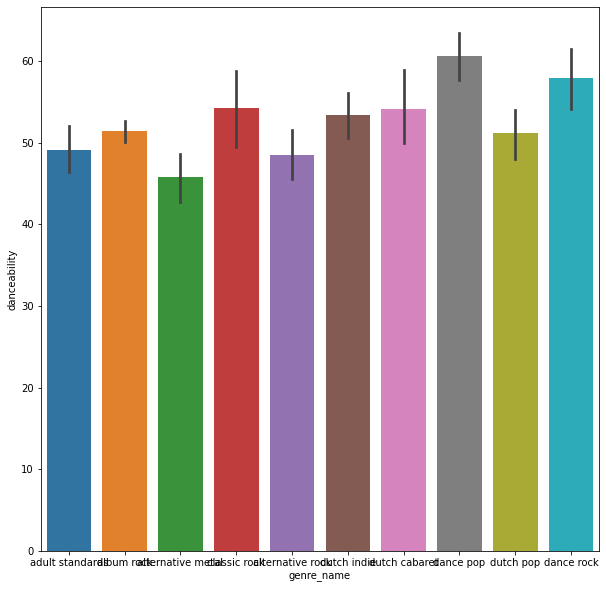

In [112]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_top10_genres,x='genre_name',y='danceability')

In [113]:
df_char.columns

Index(['song_id', 'bpm', 'energy', 'danceability', 'db', 'liveness', 'valence',
       'length', 'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [114]:
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   song_id       1994 non-null   int64
 1   bpm           1994 non-null   int64
 2   energy        1994 non-null   int64
 3   danceability  1994 non-null   int64
 4   db            1994 non-null   int64
 5   liveness      1994 non-null   int64
 6   valence       1994 non-null   int64
 7   length        1994 non-null   int64
 8   acousticness  1994 non-null   int64
 9   speechiness   1994 non-null   int64
 10  popularity    1994 non-null   int64
dtypes: int64(11)
memory usage: 171.5 KB


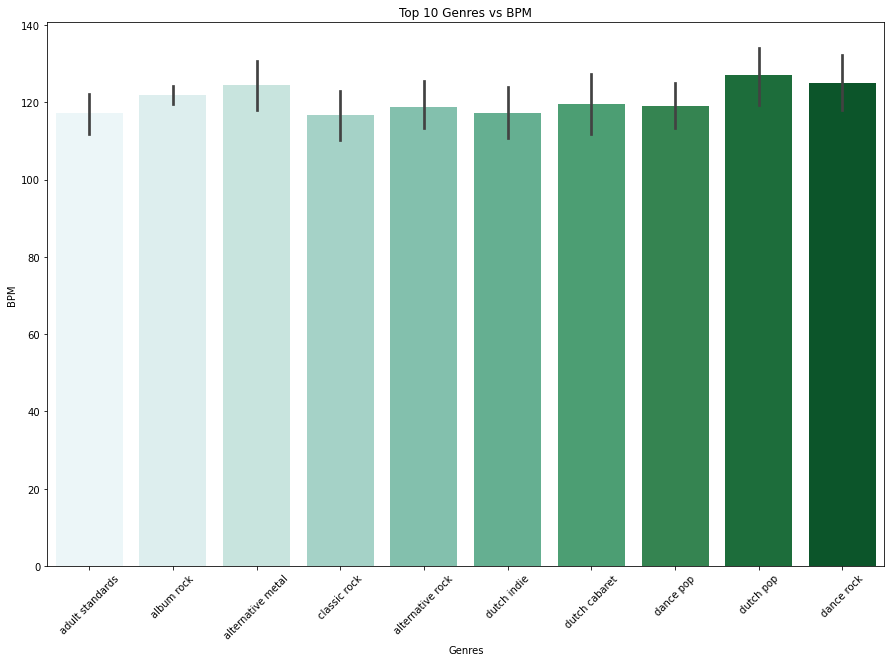

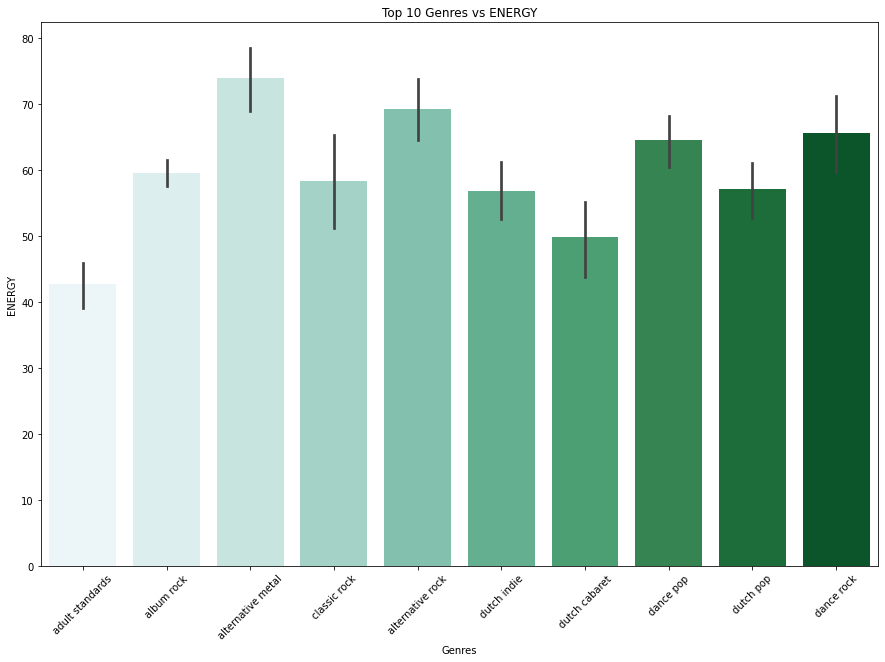

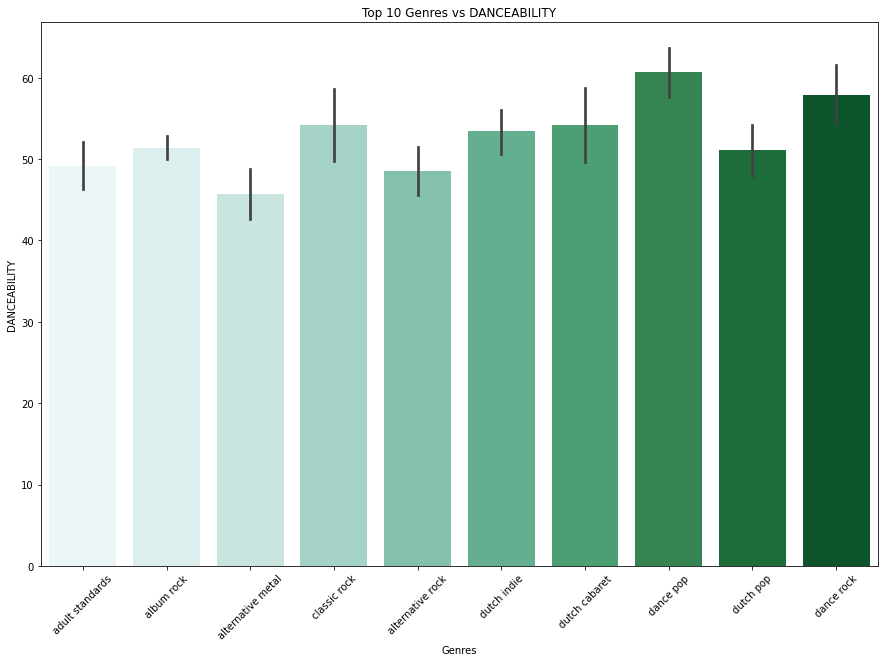

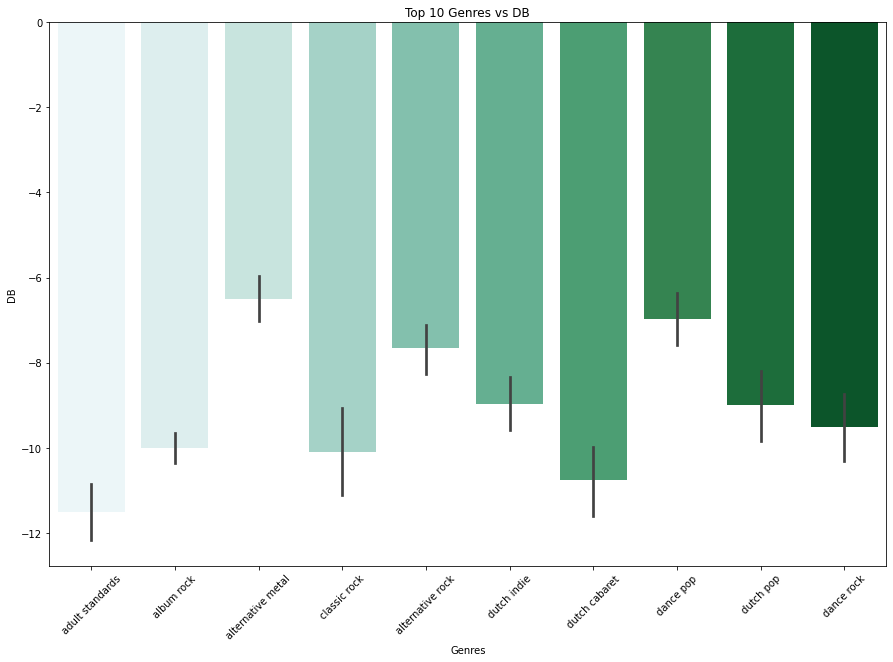

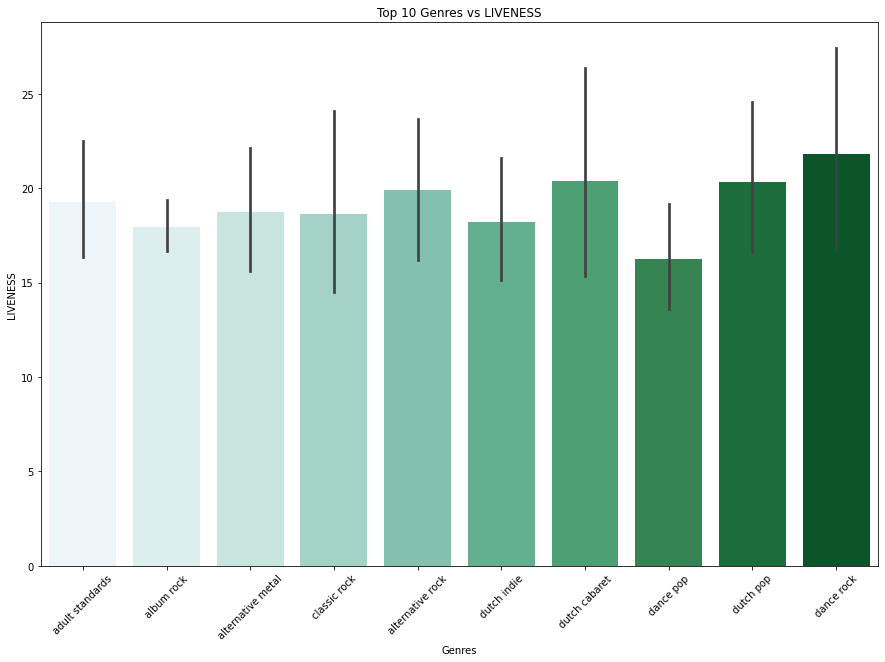

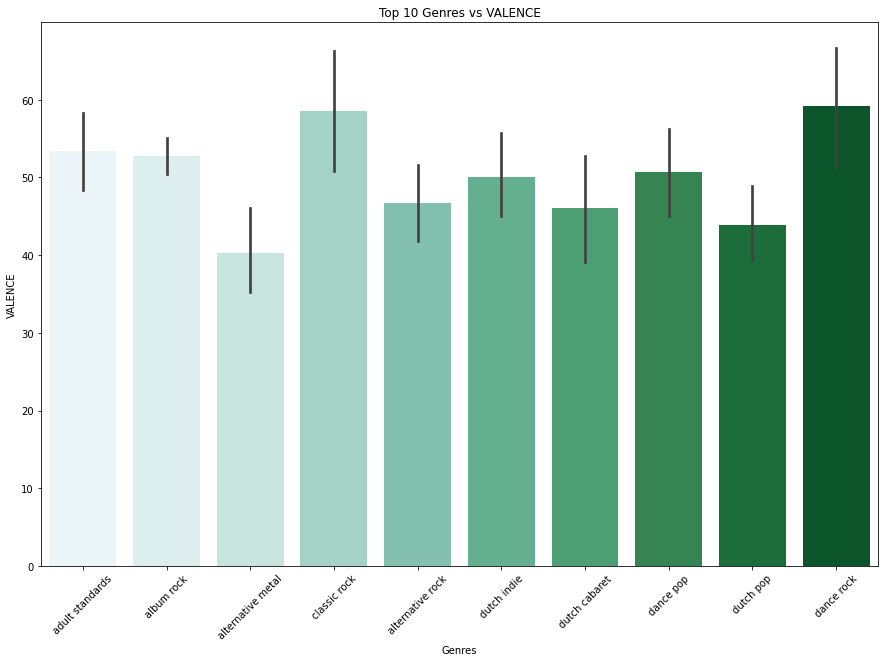

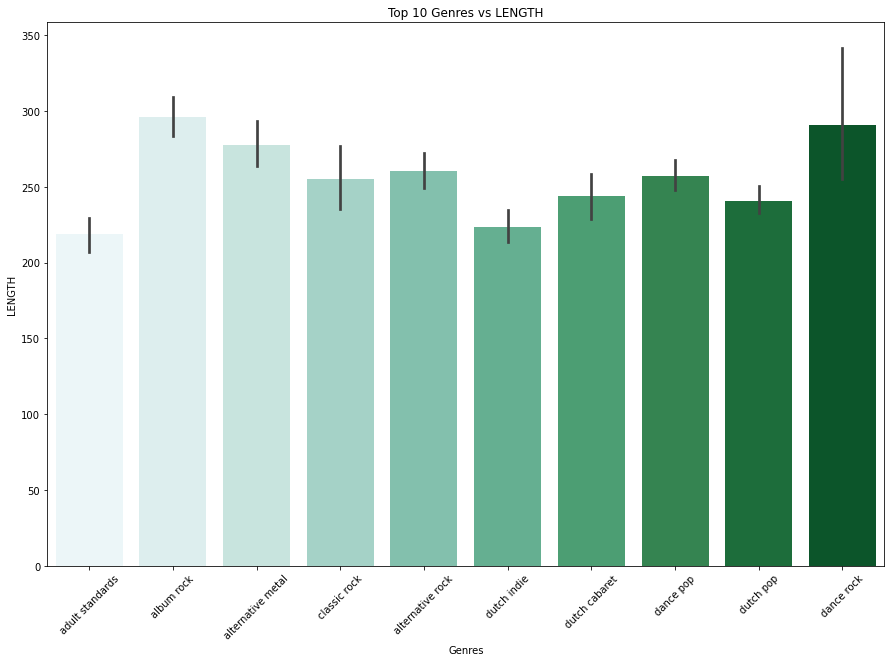

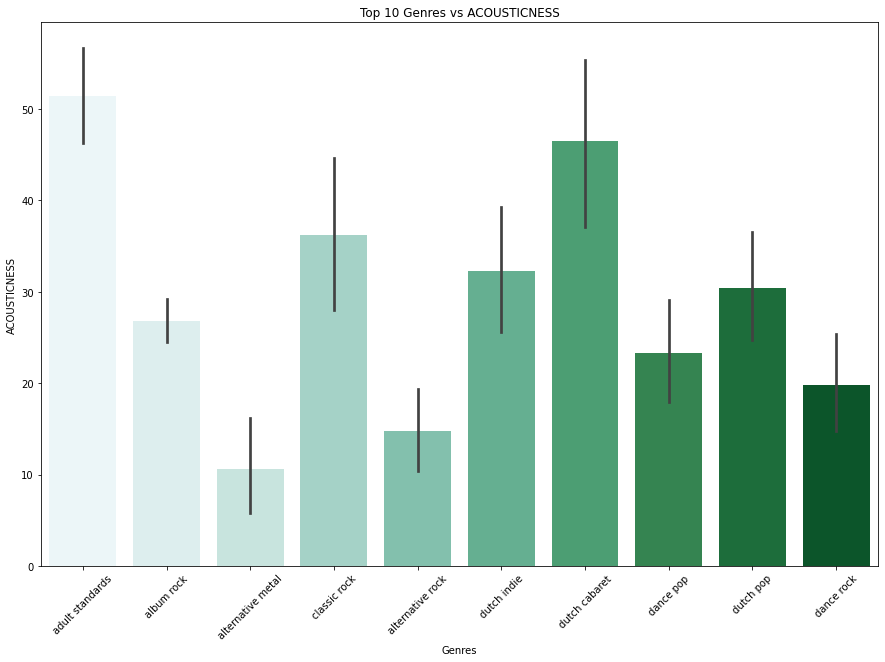

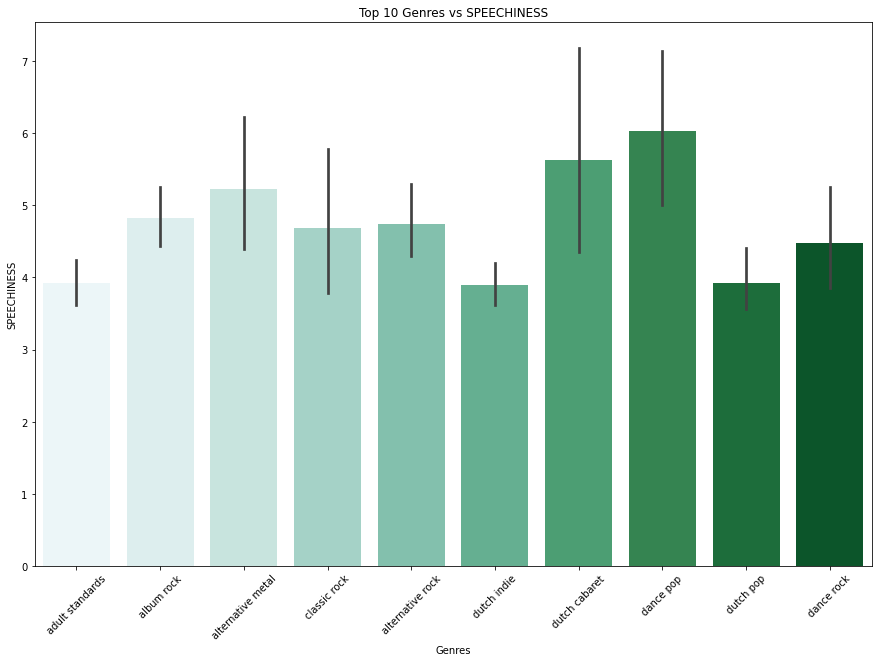

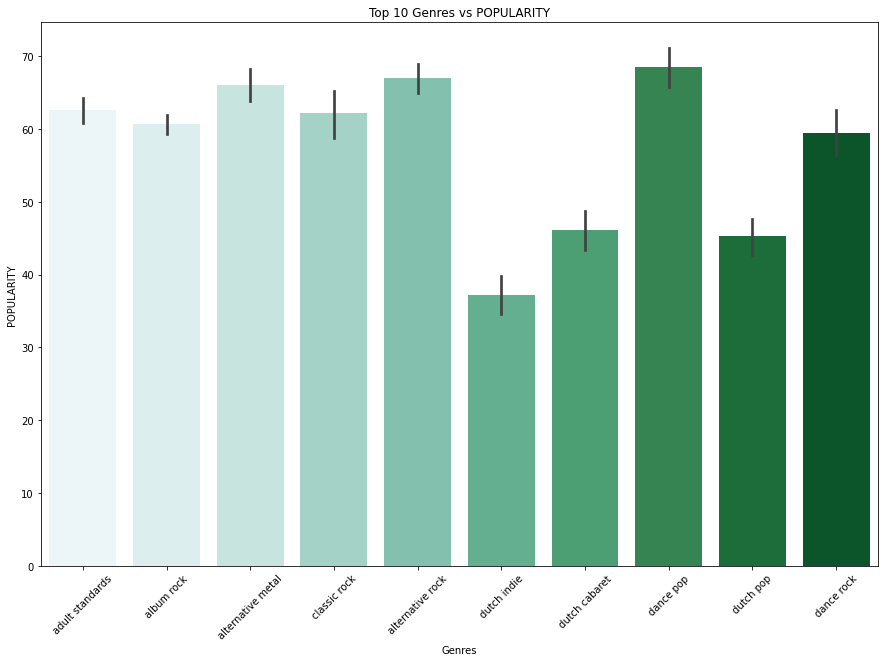

In [132]:
for col in df_char.columns:
    if col not in ['song_id']:
        plt.figure(figsize=(15,10))
        sns.barplot(data=df_top10_genres,x='genre_name',y=col, palette='BuGn')
        plt.title(f'Top 10 Genres vs {col.upper()}')
        plt.xticks(rotation=45)
        plt.xlabel('Genres')
        plt.ylabel(col.upper())
        plt.show()

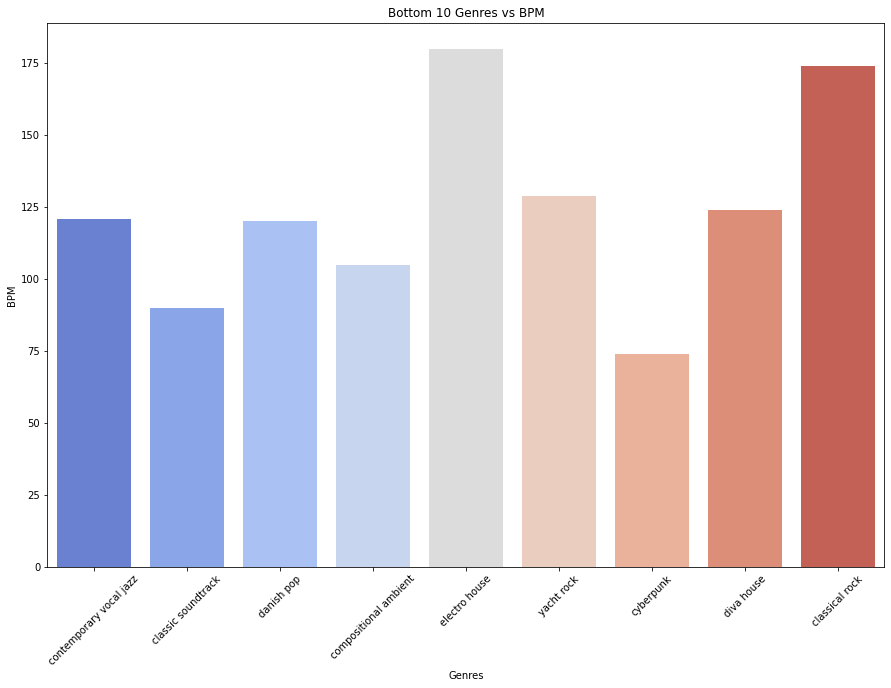

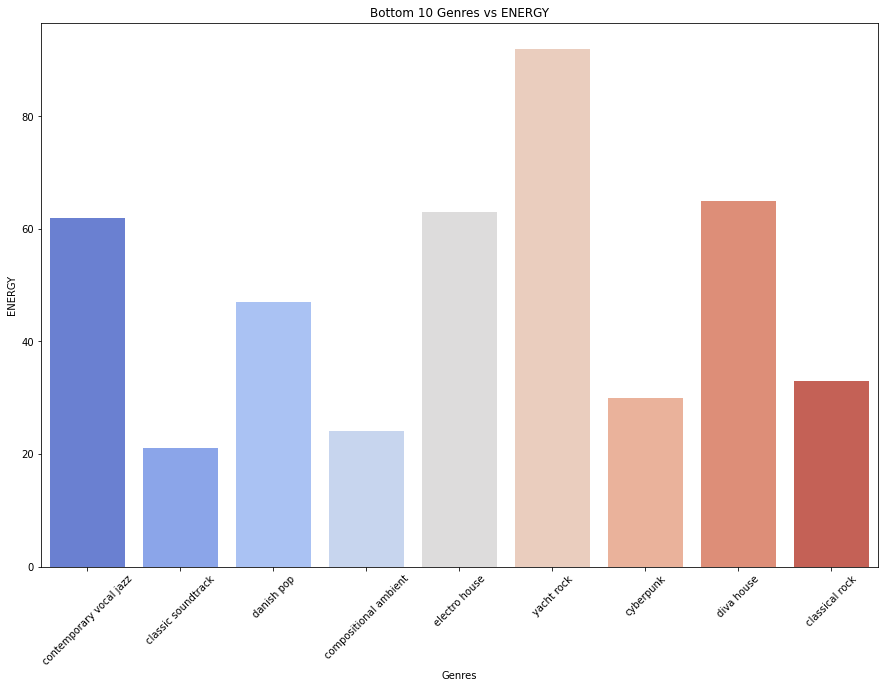

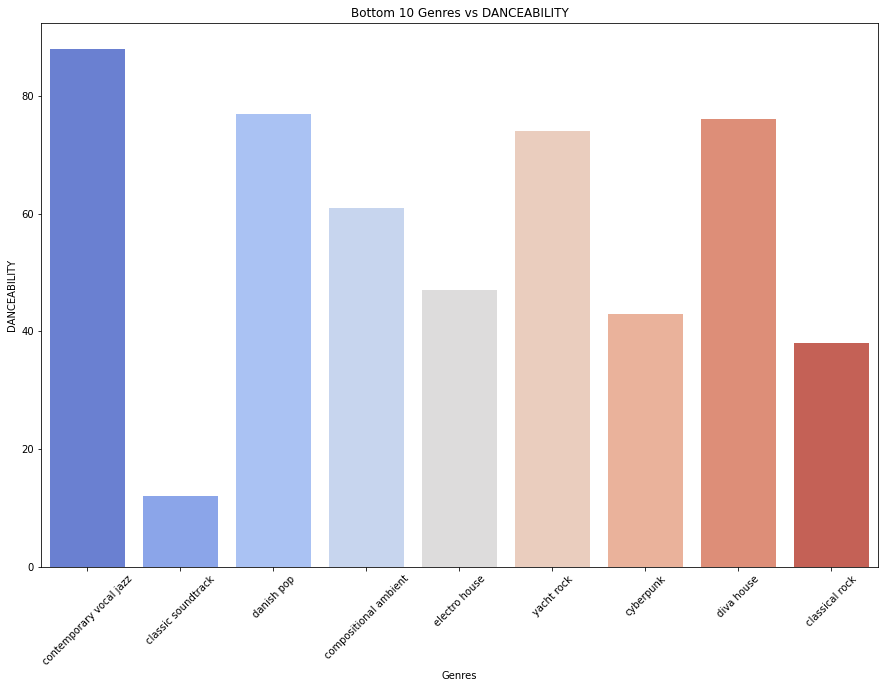

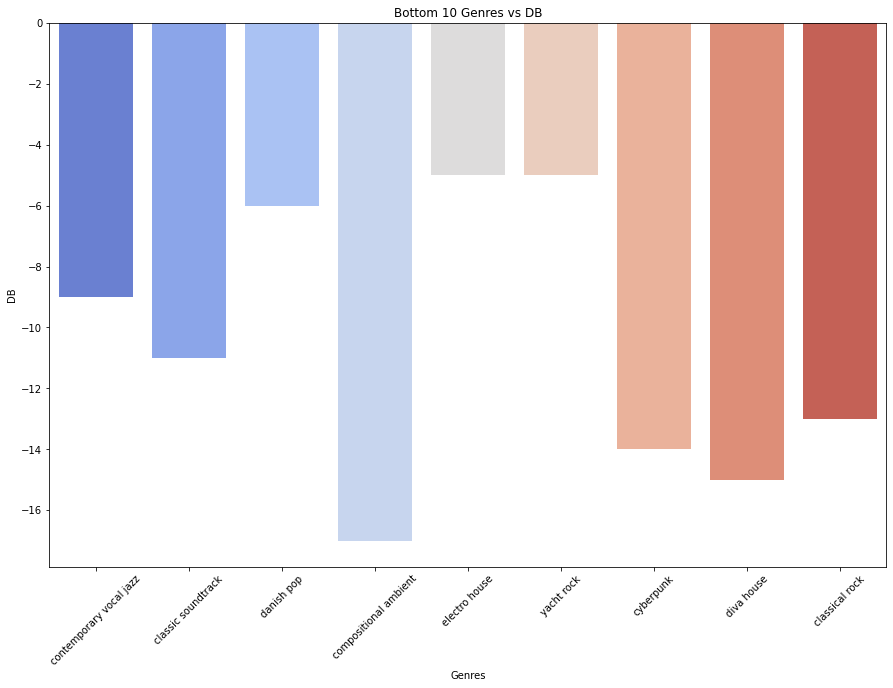

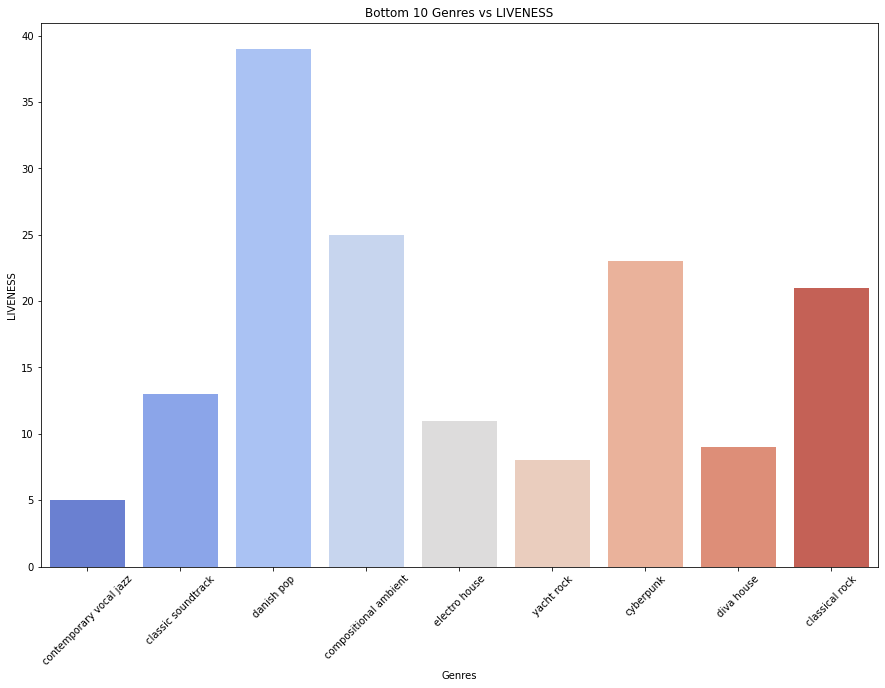

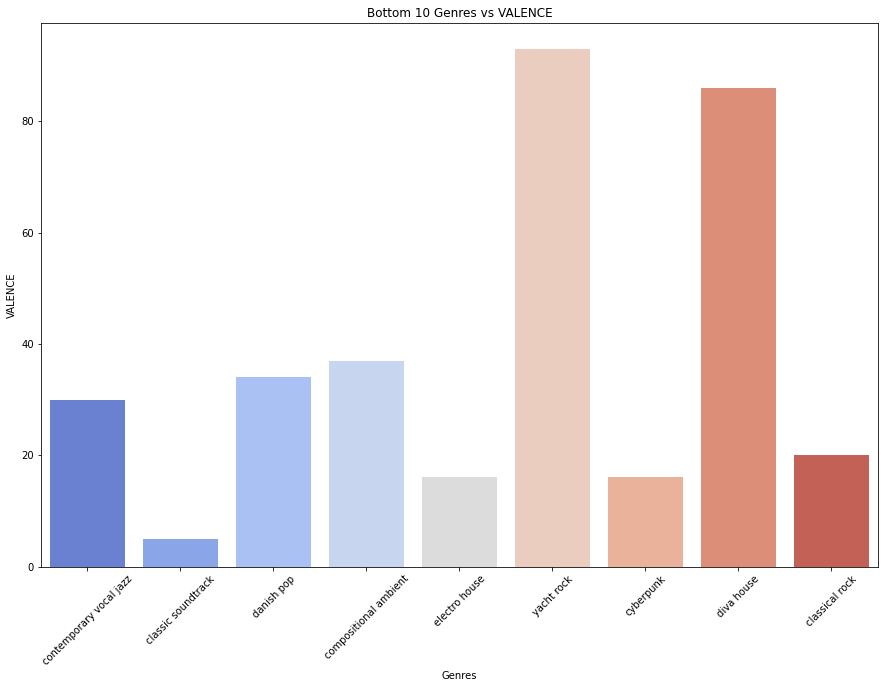

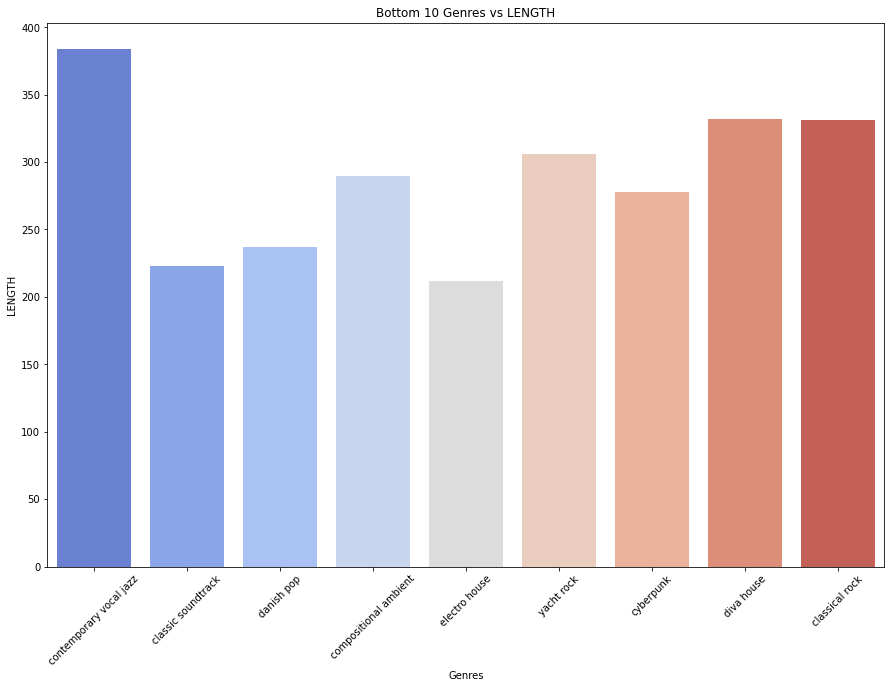

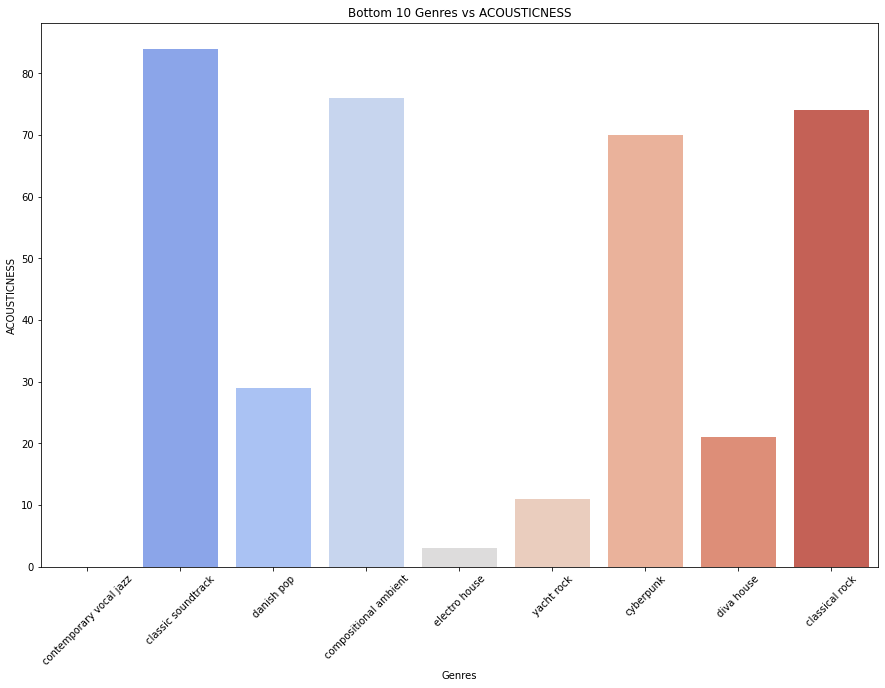

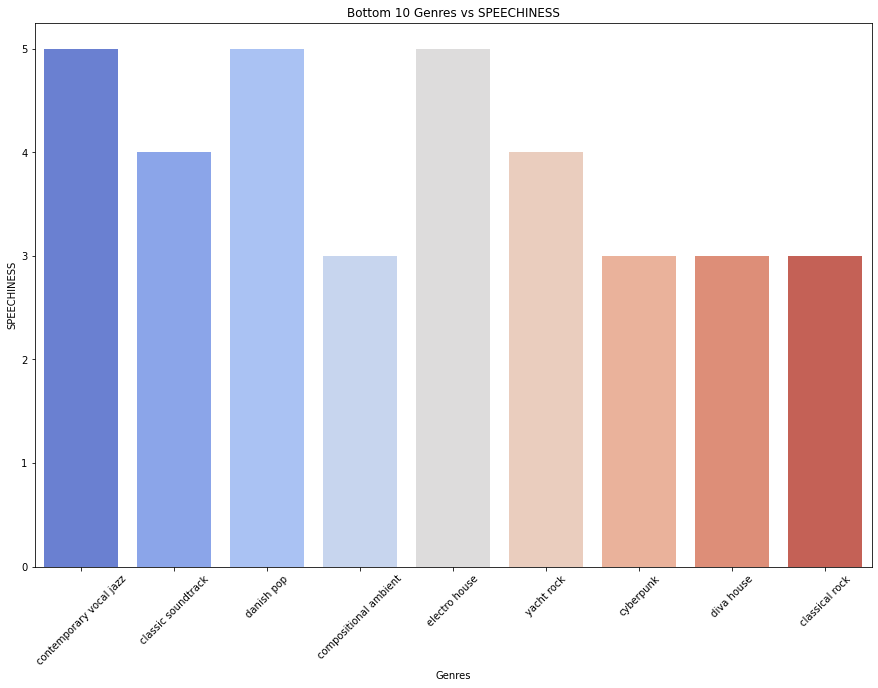

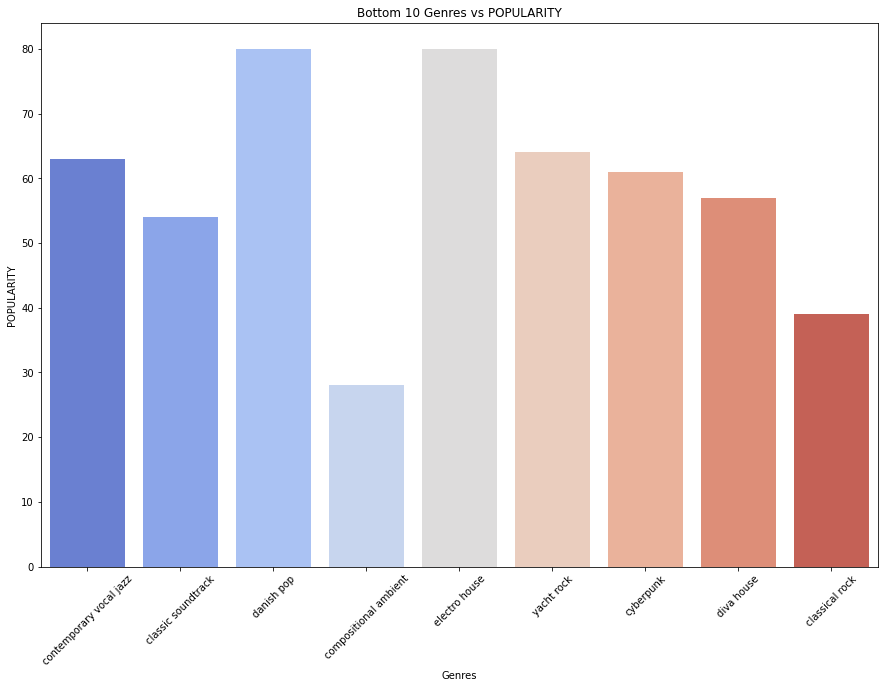

In [140]:
for col in df_char.columns:
    if col not in ['song_id']:
        plt.figure(figsize=(15,10))
        sns.barplot(data=df_bottom10_genres,x='genre_name',y=col, palette='coolwarm')
        plt.title(f'Bottom 10 Genres vs {col.upper()}')
        plt.xticks(rotation=45)
        plt.xlabel('Genres')
        plt.ylabel(col.upper())
        plt.show()

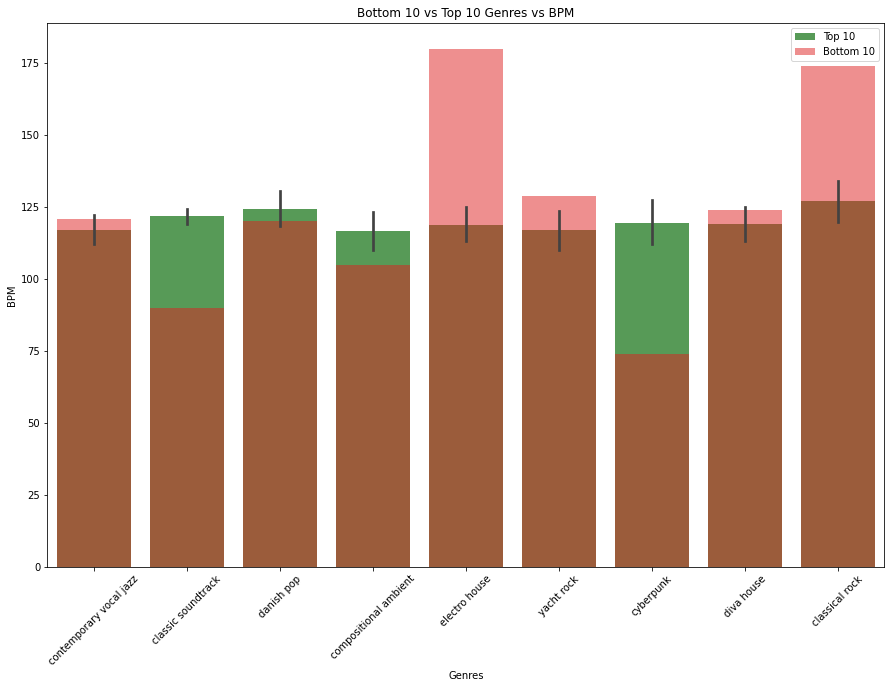

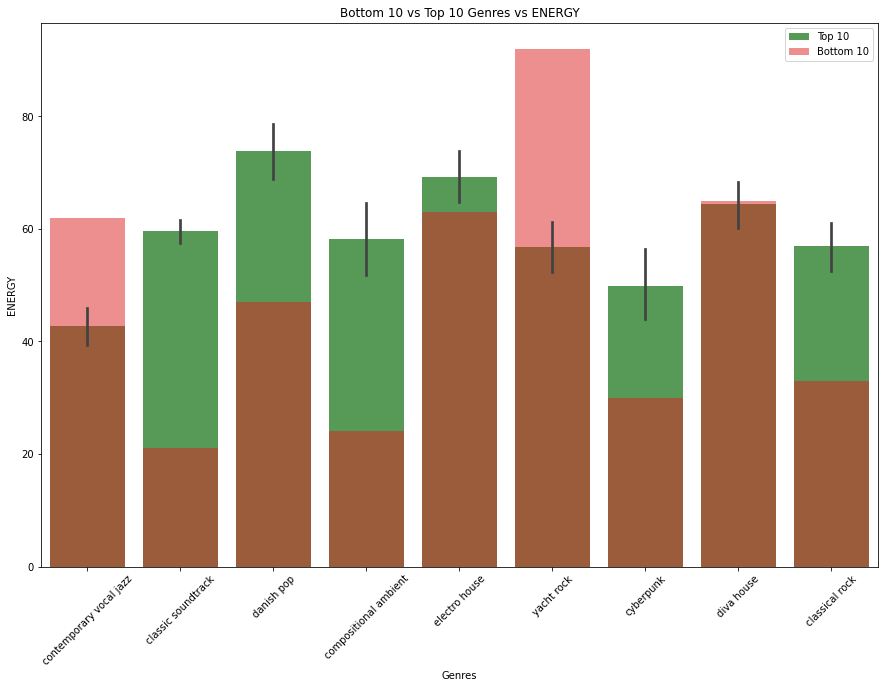

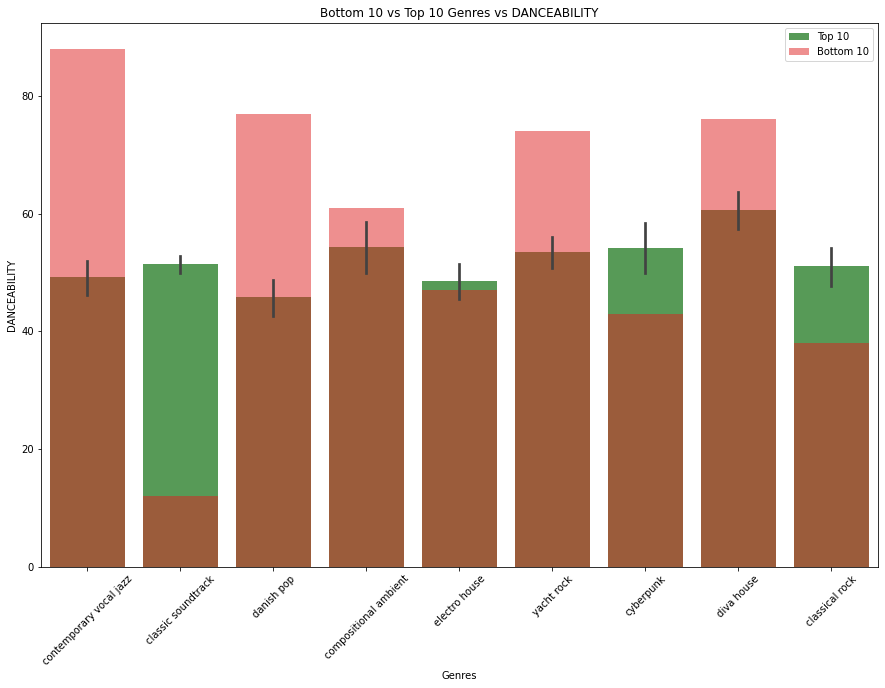

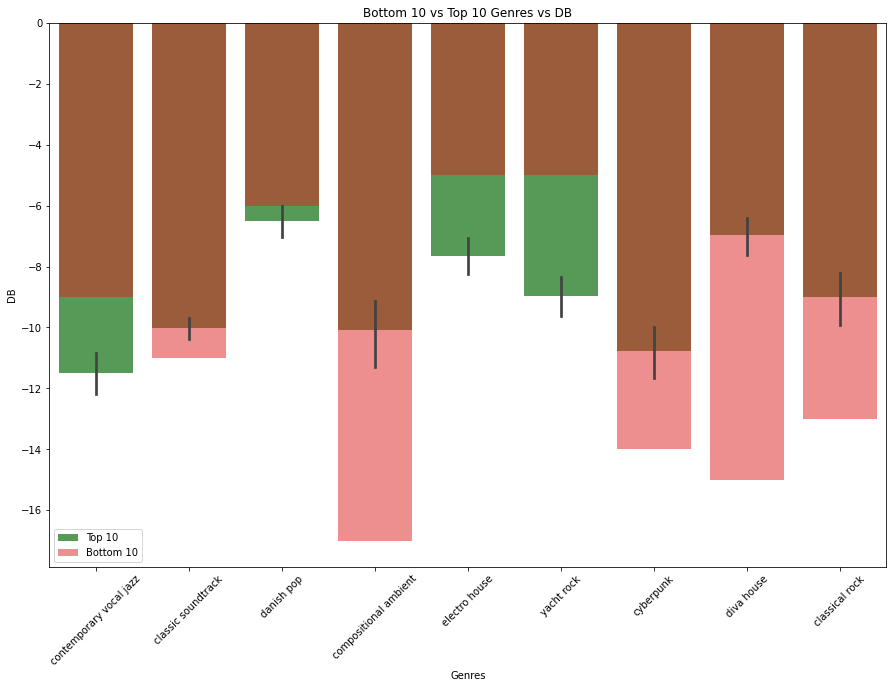

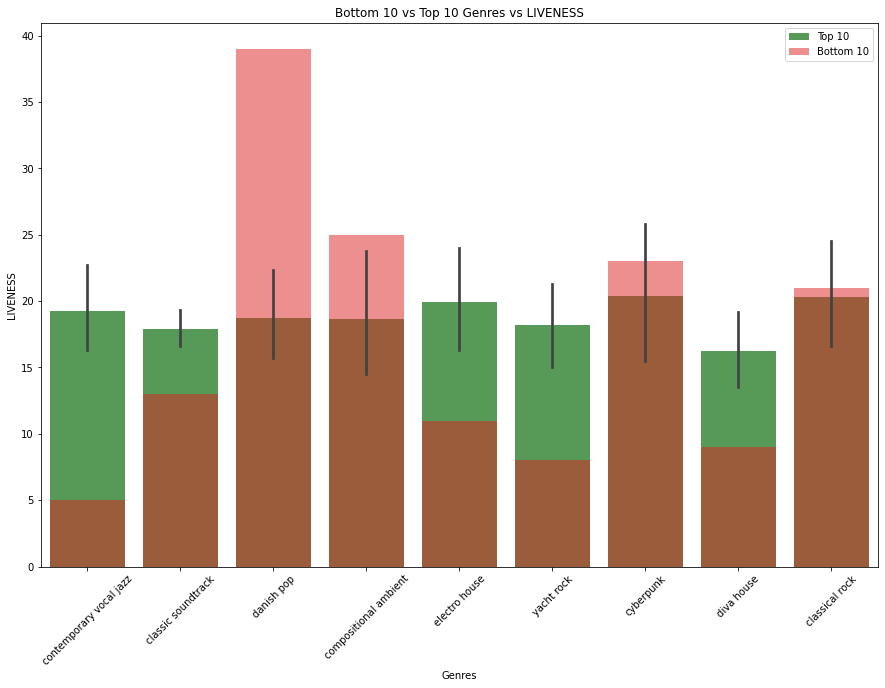

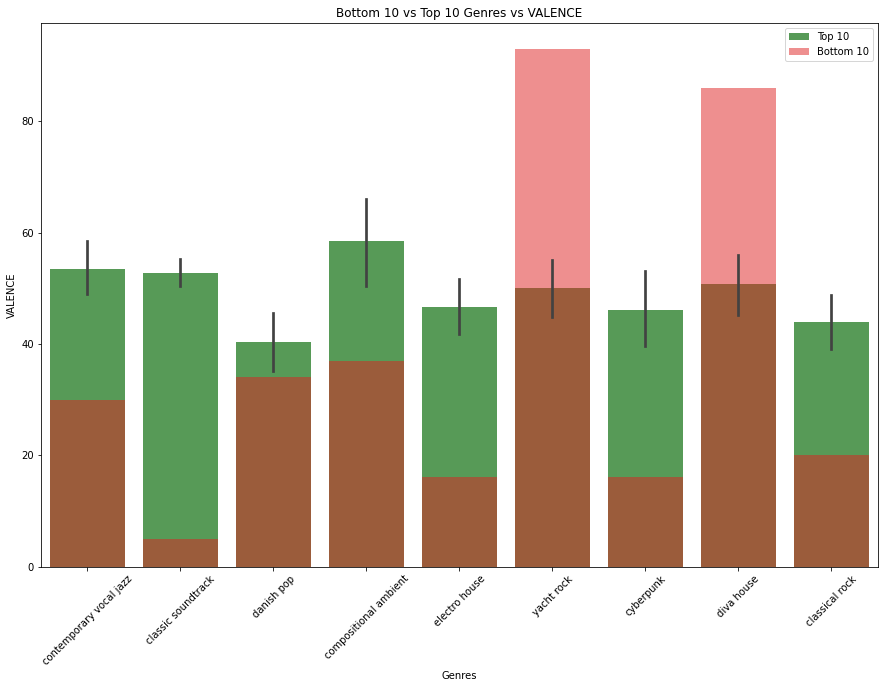

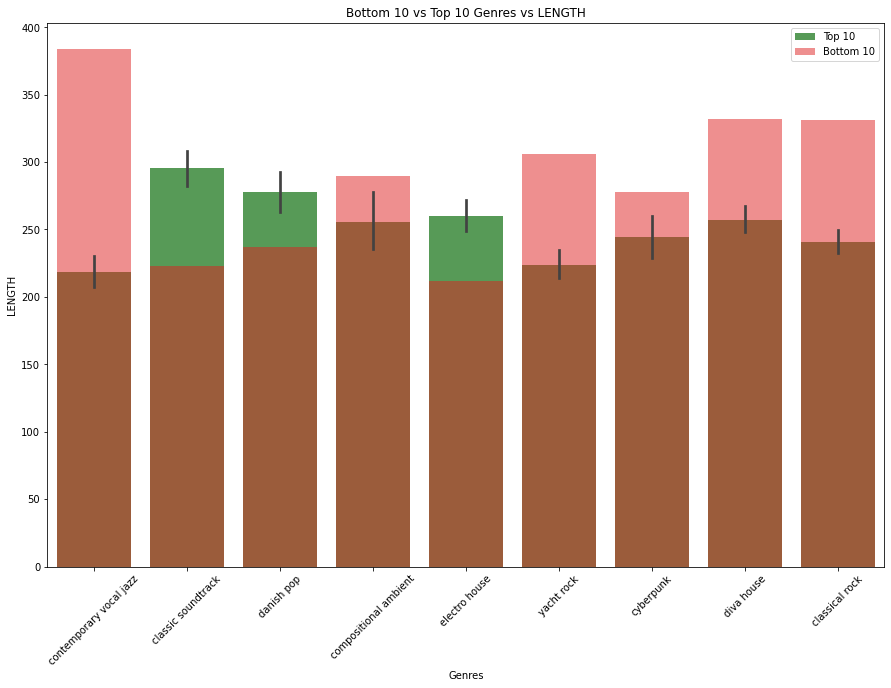

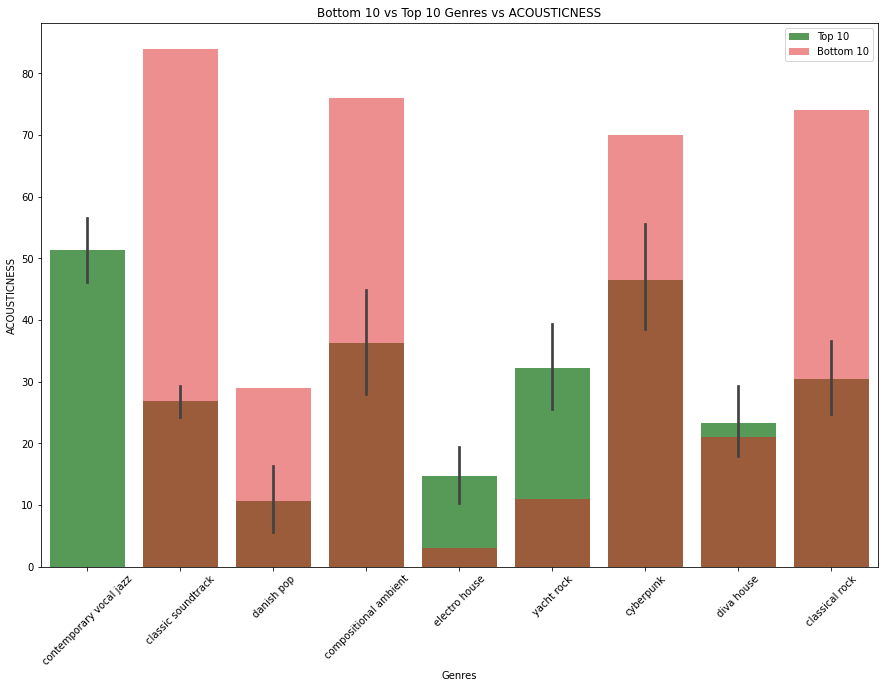

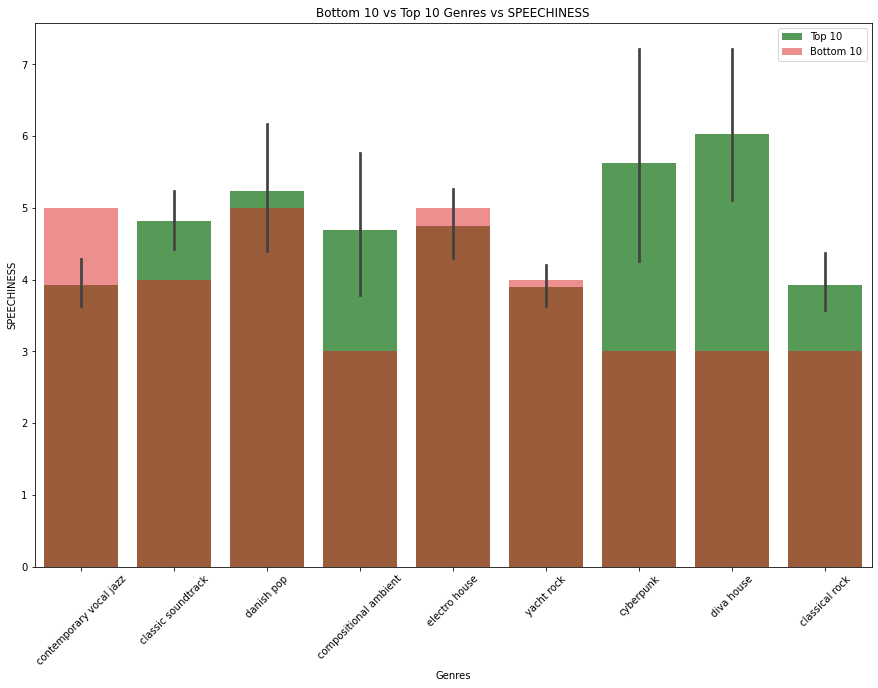

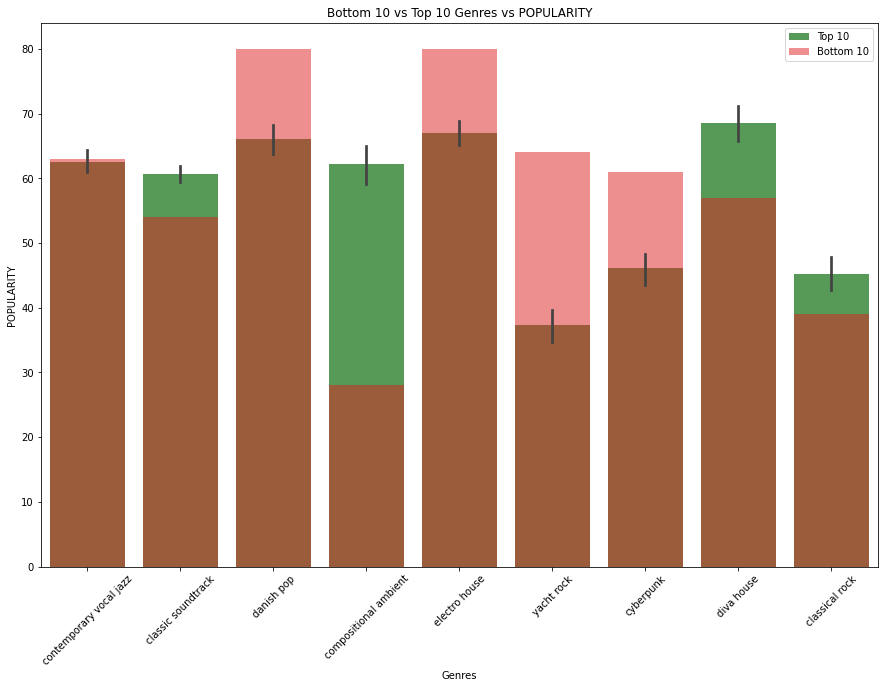

In [166]:
for col in df_char.columns:
    if col not in ['song_id']:
        plt.figure(figsize=(15,10))
        sns.barplot(data=df_top10_genres,x='genre_name',y=col ,alpha=0.7,color='green', label='Top 10' )
        sns.barplot(data=df_bottom10_genres,x='genre_name',y=col, alpha=0.5,color='red',label='Bottom 10')
        plt.title(f'Bottom 10 vs Top 10 Genres vs {col.upper()}')
        plt.xticks(rotation=45)
        plt.xlabel('Genres')
        plt.ylabel(col.upper())
        plt.legend()
        plt.show()
        

['bpm',
 'energy',
 'danceability',
 'db',
 'liveness',
 'valence',
 'length',
 'acousticness',
 'speechiness',
 'popularity']

In [185]:
df_top10_genres.groupby('genre_name')[[x for x in df_char.columns if x != 'song_id']].mean()

,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
genre_name,,,,,,,,,,
adult standards,117.105691,42.658537,49.162602,-11.504065,19.243902,53.398374,218.626016,51.382114,3.926829,62.577236
album rock,121.929782,59.549637,51.411622,-10.014528,17.924939,52.721550,295.871671,26.847458,4.818402,60.694915
alternative metal,124.442857,73.885714,45.742857,-6.500000,18.742857,40.314286,277.442857,10.614286,5.228571,66.014286
alternative rock,118.837209,69.209302,48.534884,-7.662791,19.906977,46.674419,260.337209,14.732558,4.744186,66.941860
classic rock,116.745098,58.254902,54.235294,-10.098039,18.647059,58.529412,255.196078,36.235294,4.686275,62.156863
dance pop,119.072289,64.457831,60.650602,-6.975904,16.228916,50.710843,257.253012,23.325301,6.024096,68.518072
dance rock,124.903846,65.576923,57.903846,-9.519231,21.826923,59.211538,290.461538,19.826923,4.480769,59.384615
dutch cabaret,119.588235,49.862745,54.137255,-10.764706,20.372549,46.019608,244.156863,46.549020,5.627451,46.058824
dutch indie,117.106667,56.773333,53.400000,-8.973333,18.200000,50.120000,223.760000,32.293333,3.893333,37.266667


<Figure size 1080x720 with 0 Axes>

In [309]:
#df_bottom10_genres.groupby('genre_name')[[x for x in df_char.columns if x != 'song_id']].mean().plot.bar()

In [310]:
# plt.figure(figsize=(15,10))
# sns.barplot(data=df_top10_genres,x=df_char.columns,y=col ,alpha=0.7,color='green', label='Top 10' )
# plt.title(f'Bottom 10 Genres vs {col.upper()}')
# plt.xticks(rotation=45)
# plt.xlabel('Genres')
# plt.ylabel(col.upper())
# plt.legend()
# plt.show()

In [274]:
df_mean = pd.DataFrame()
drop_col = ['song_id','year','artist_id','genre_id']
df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
df_mean['bottom_10'] = df_bottom10_genres.drop(drop_col,1).mean()
df_mean['difference'] = df_mean['top_10'] - df_mean['bottom_10']
df_mean

/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_26651/529735406.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_26651/529735406.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_26651/529735406.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mean['bottom_10'] = df_bottom10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_26651/529735406.py:4: Future

,top_10,bottom_10,difference
bpm,120.953297,124.111111,-3.157814
energy,59.081502,48.555556,10.525946
danceability,51.954212,57.333333,-5.379121
db,-9.402930,-10.555556,1.152625
liveness,18.698718,17.111111,1.587607
valence,50.751832,37.444444,13.307387
length,266.284799,288.111111,-21.826313
acousticness,29.031136,40.888889,-11.857753
speechiness,4.709707,3.888889,0.820818
popularity,58.802198,58.444444,0.357753


In [284]:
df_diff_info = df_mean[abs(df_mean['difference']) >10]
df_diff_info = df2
df_diff_info

,energy,valence,length,acousticness
top_10,59.081502,50.751832,266.284799,29.031136
bottom_10,48.555556,37.444444,288.111111,40.888889
difference,10.525946,13.307387,-21.826313,-11.857753


In [311]:
cols = list(df_diff_info.columns)
cols.append('genre_name')
cols.append('popularity')

In [313]:
df_temp = df_top10_genres[cols]


,energy,valence,length,acousticness,genre_name,popularity
0,30,68,201,94,adult standards,71
1,20,62,186,88,adult standards,74
2,5,31,162,88,adult standards,49
3,97,72,212,0,adult standards,64
4,73,87,140,57,adult standards,65
...,...,...,...,...,...,...
1680,90,84,193,7,dance rock,67
1681,90,88,225,2,dance rock,83
1682,67,30,224,4,dance rock,37
1683,93,90,271,14,dance rock,64


In [ ]:
#TODO: MAKE GRAPH BIGGER

<Figure size 1080x720 with 0 Axes>

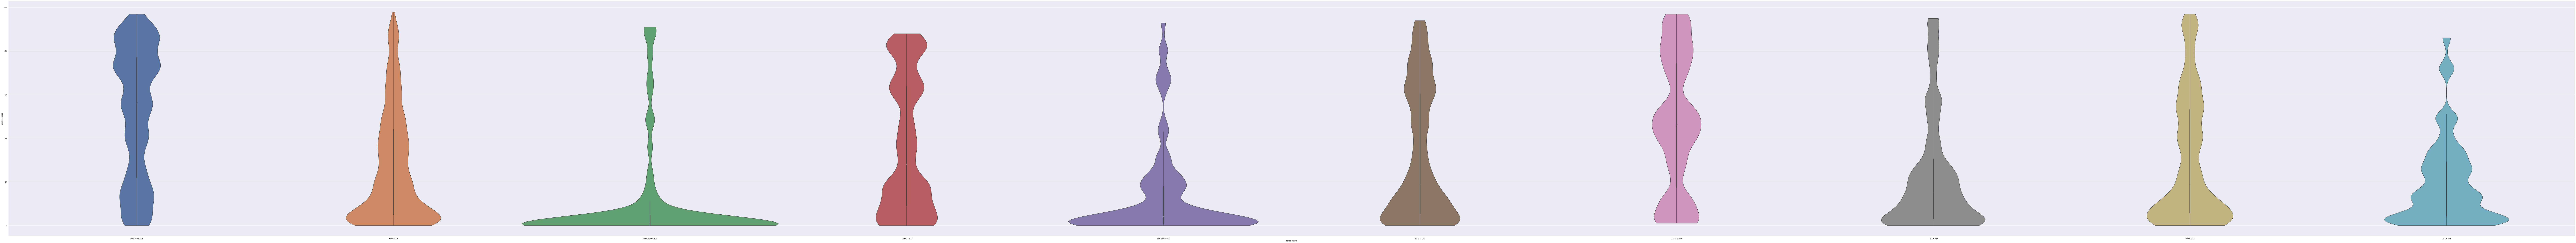

In [357]:
plt.figure(figsize=(15,10))
sns.catplot(
    data=df_temp, x="genre_name", y="acousticness",
    kind="violin", bw=.15, cut=0,height=20,width=1,aspect=10.5)
plt.show()

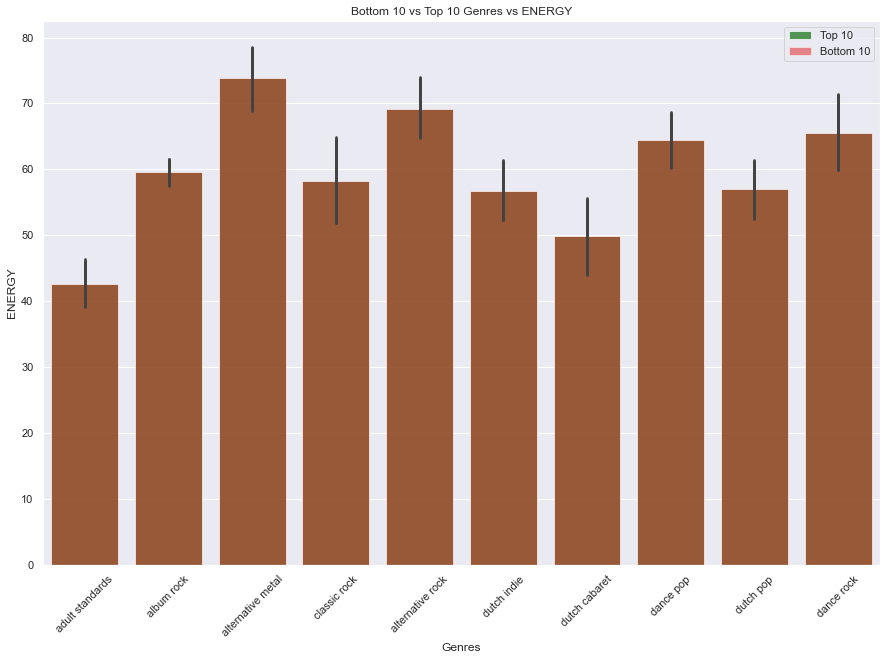

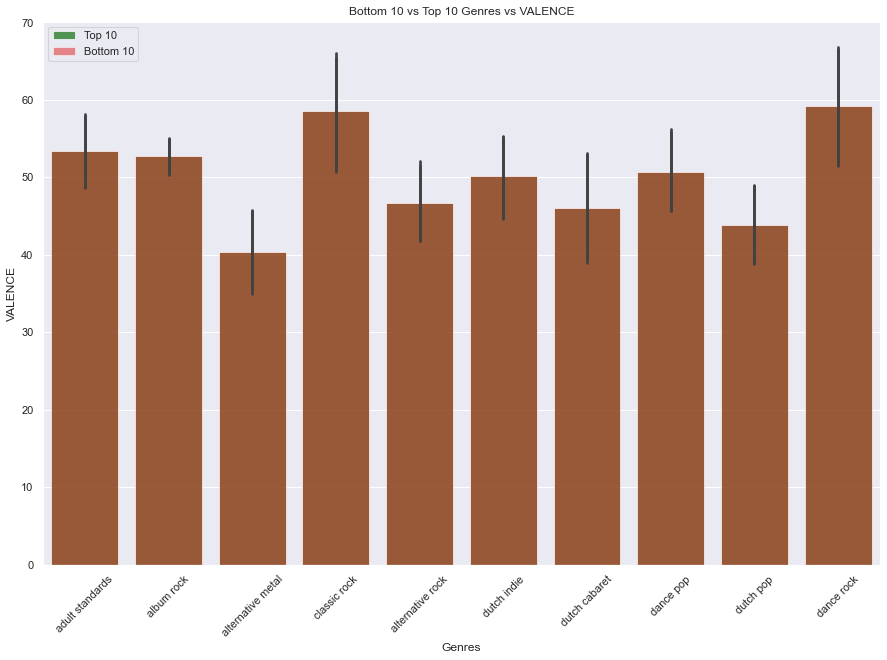

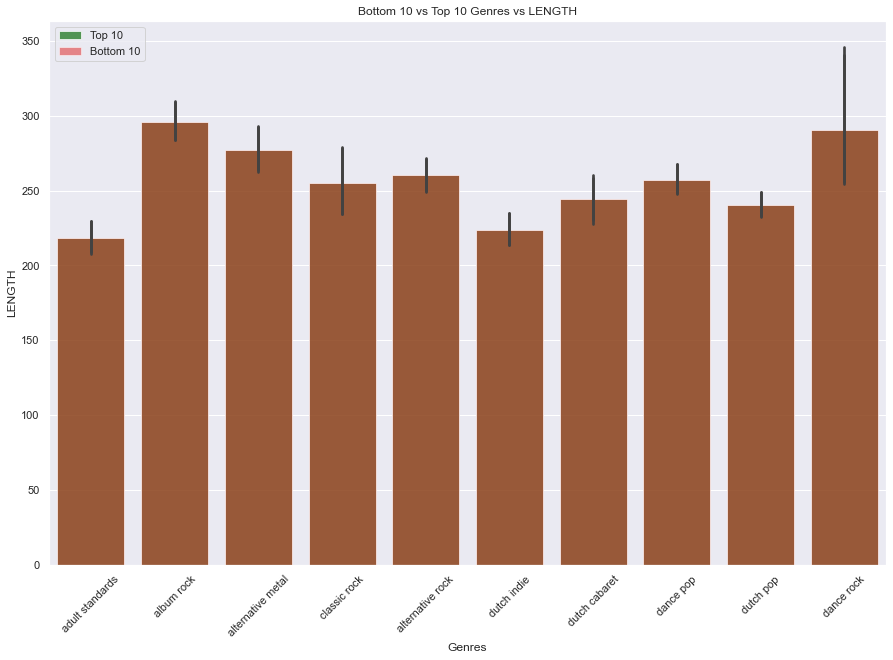

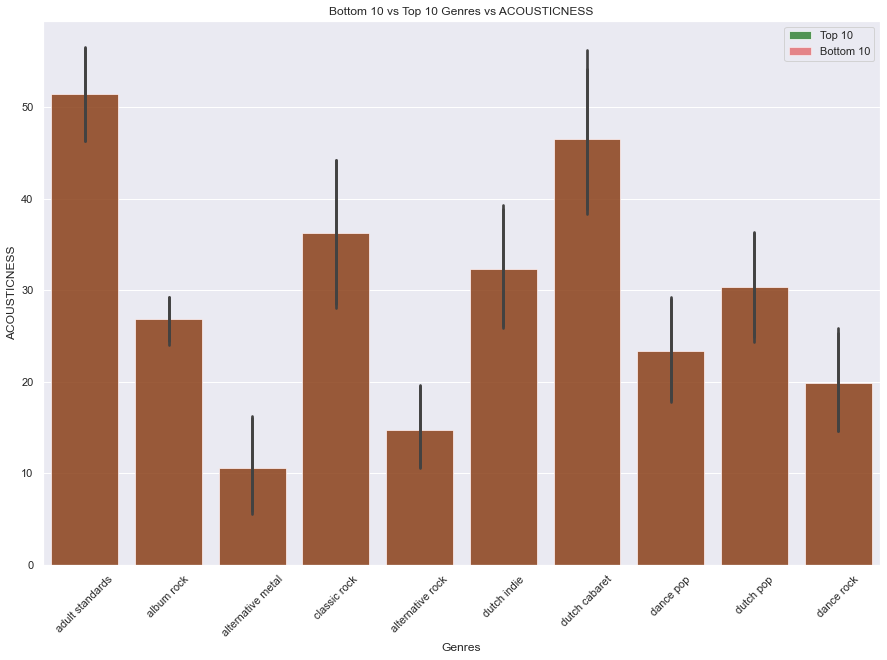

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1080x720 with 0 Axes>

In [359]:
for col in df_temp.columns:
    if col not in ['song_id']:
        plt.figure(figsize=(15,10))
        sns.barplot(data=df_temp,x='genre_name',y=col ,alpha=0.7,color='green', label='Top 10' )
        sns.barplot(data=df_temp,x='genre_name',y=col, alpha=0.5,color='red',label='Bottom 10')
        plt.title(f'Bottom 10 vs Top 10 Genres vs {col.upper()}')
        plt.xticks(rotation=45)
        plt.xlabel('Genres')
        plt.ylabel(col.upper())
        plt.legend()
        plt.show()
        

In [322]:
df

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74
2,10,Love Me Tender,2002,10,0,adult standards,Elvis Presley,109,5,44,-16,11,31,162,88,4,49
3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,10,0,adult standards,Elvis Presley,115,97,60,-6,13,72,212,0,5,64
4,387,(You're The) Devil in Disguise,2002,10,0,adult standards,Elvis Presley,123,73,48,-8,11,87,140,57,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1761,Narcotic - Long Version,1998,679,144,german alternative rock,Liquido,102,59,59,-7,8,36,278,0,3,42
1990,1817,Il Volo,1999,691,145,classic italian pop,Zucchero,150,40,45,-12,6,17,332,3,3,24
1991,1820,All The Small Things,1999,694,146,pop punk,blink-182,149,90,43,-5,61,68,167,1,5,79
1992,1880,"It's A Man's, Man's, Man's World",1966,706,147,motown,James Brown & The Famous Flames,81,24,54,-17,13,57,167,69,4,63


In [325]:
df['year'].describe()

count    1994.000000
mean     1992.992979
std        16.116048
min      1956.000000
25%      1979.000000
50%      1993.000000
75%      2007.000000
max      2019.000000
Name: year, dtype: float64

In [344]:
labels = '55-65 65-76 75-83 83-92 92-01 01-10 10-29'.split()

In [345]:
df['decade_group'] = pd.cut(df['year'],bins=7,labels=labels)
df['decade_group'].unique()

['01-10', '10-29', '65-76', '92-01', '55-65', '75-83', '83-92']
Categories (7, object): ['55-65' < '65-76' < '75-83' < '83-92' < '92-01' < '01-10' < '10-29']

<AxesSubplot:xlabel='decade_group', ylabel='popularity'>

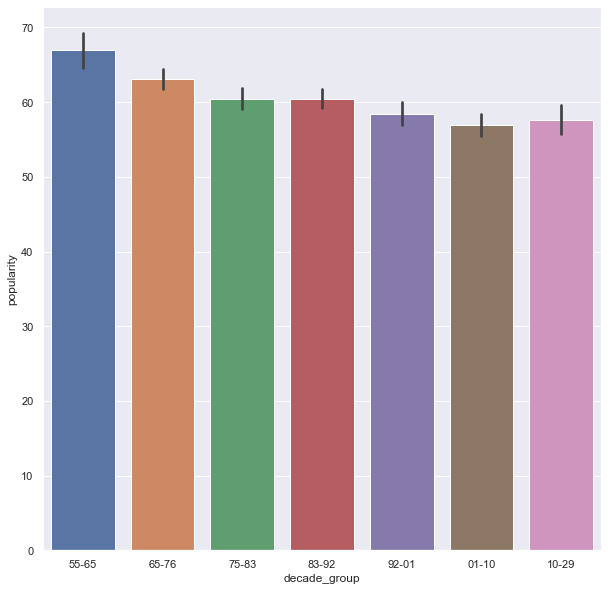

In [348]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='decade_group',y='popularity')

In [432]:
df.groupby(['decade_group']).mean()

,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
decade_group,,,,,,,,,,,,,,
55-65,1873.400000,1962.711111,318.111111,16.733333,122.266667,46.000000,49.533333,-11.066667,17.200000,60.422222,185.844444,57.000000,4.200000,66.955556
65-76,1325.416084,1969.989510,376.244755,19.968531,119.646853,50.587413,48.188811,-10.958042,17.986014,51.695804,261.685315,39.290210,4.765734,63.111888
75-83,1114.000000,1978.712871,388.392739,30.861386,120.844884,61.085809,55.983498,-9.613861,19.719472,59.221122,278.422442,27.759076,5.174917,60.448845
83-92,1433.500000,1987.880952,415.672619,35.294643,119.083333,61.303571,54.589286,-10.175595,18.276786,51.806548,283.824405,23.735119,4.488095,60.482143
92-01,1385.538194,1997.114583,339.739583,29.149306,118.784722,59.864583,52.458333,-8.680556,19.444444,42.600694,262.229167,27.003472,4.913194,58.444444
01-10,216.602703,2005.997297,93.000000,20.694595,122.267568,64.381081,53.545946,-7.332432,19.894595,45.948649,253.956757,25.637838,5.243243,56.989189
10-29,615.500000,2014.816940,213.980874,31.631148,119.978142,60.912568,54.428962,-7.612022,18.893443,44.797814,248.344262,27.573770,5.401639,57.587432


In [434]:
df.sort_values(['popularity']).groupby(['decade_group','genre_name'])['popularity'].mean()

decade_group  genre_name      
55-65         acid jazz            NaN
              acoustic pop         NaN
              adult standards     68.0
              afropop              NaN
              alaska indie         NaN
                                  ... 
10-29         stomp and holler    64.0
              streektaal          28.0
              trance               NaN
              uk pop               NaN
              yacht rock           NaN
Name: popularity, Length: 1043, dtype: float64